In [46]:
#Date of last revision: 07/01/2022
#This code reads in SS data to calculate locaton of eddies and finds the mean values of different variables within the eddies
import xarray as xr 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import netCDF4 as nc
import datetime as dt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
from scipy.stats import linregress
import numpy.ma as ma
import glob
import os
from py_eddy_tracker.dataset.grid import RegularGridDataset
from py_eddy_tracker.observations.observation import EddiesObservations

In [47]:
#take satelite files pats, sort them and load them into list
sat_files = sorted(glob.glob('/data/watkinson/Summer2022/data/cafe/1day_regrid/*.nc'))

print(len(sat_files))
#take anticyclonic eddy files paths, sort them and load them into list
anti_files = sorted(glob.glob('/data/watkinson/Summer2022/data/eddies/Anticyclonic/Anticyclonic_2004*.nc'))
#anti_files = sorted(glob.glob('/data/watkinson/Fall2022/Eddy_data/GoM_tuned_eddies/Anticyclonic/Anti*.nc'))

#take cyclonic eddy files paths, sort them and load them into list
cycl_files = sorted(glob.glob('/data/watkinson/Summer2022/data/eddies/Cyclonic/Cyclonic_2004*.nc'))
#cycl_files = sorted(glob.glob('/data/watkinson/Fall2022/Eddy_data/GoM_tuned_eddies/Cyclonic/Cyclonic_2004*.nc'))

cycl_chlor_max = list()#empty list to load cyclonic eddy chlorophyll mean vlaues into throghout loop below
anti_chlor_max = list()#empty list to load anticyclonic eddy chlorophyll mean values into throghout loop below

cycl_chlor_min = list()#empty list to load cyclonic eddy chlorophyll mean vlaues into throghout loop below
anti_chlor_min = list()

n=0 #set n to 0 so the loop starts with first file in list
while n < len(anti_files): #once finalized, put this inside a funciton so you can calcualte the mean for multiple variables
    #Load in data
    a = EddiesObservations.load_file(anti_files[n])#anticyclonic eddy data
    c = EddiesObservations.load_file(cycl_files[n])#cyclonic eddy data
    sat_data = RegularGridDataset((sat_files[n]),"lon","lat",nan_masking=False)#satellite data
    
    #this interpolates the satellite data grid onto the contours of the eddy data and uses mean function to calcualte values inside these contours
        #can also do this method for: ‘center’, ‘mean’, ‘max’, ‘min’, ‘nearest’ 
    anti_chlor = a.interp_grid(sat_data, "chlor_a", method="max", intern=True)#this interpolates the sa
    cycl_chlor = c.interp_grid(sat_data, "chlor_a", method="max", intern=True)
    
    anti_chlor_m = a.interp_grid(sat_data, "chlor_a", method="min", intern=True)#this interpolates the sa
    cycl_chlor_m = c.interp_grid(sat_data, "chlor_a", method="min", intern=True)
    #append the result for each file loop to the variables below
    anti_chlor_max = np.concatenate([anti_chlor_max,anti_chlor])
    cycl_chlor_max = np.concatenate([cycl_chlor_max,cycl_chlor])
    
    anti_chlor_min = np.concatenate([anti_chlor_min,anti_chlor_m])
    cycl_chlor_min = np.concatenate([cycl_chlor_min,cycl_chlor_m])
    #anti_chlor_mean.append(anti_chlor)
    #cycl_chlor_mean.append(cycl_chlor)
    
    n=n+1


File was created with py-eddy-tracker version 'None' but software version is '3.6'
File was created with py-eddy-tracker version 'None' but software version is '3.6'
We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/cafe/1day_regrid/A2004001.L4_gom_day_CAFE.nc
File was created with py-eddy-tracker version 'None' but software version is '3.6'
File was created with py-eddy-tracker version 'None' but software version is '3.6'
We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/cafe/1day_regrid/A2004002.L4_gom_day_CAFE.nc
File was created with py-eddy-tracker version 'None' but software version is '3.6'
File was created with py-eddy-tracker version 'None' but software version is '3.6'
We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/cafe/1day_regrid/A2004003.L4_gom_day_CAFE.nc
File was created with py-eddy-tracker version 'None' but software version is '3.6'
File was created with py-eddy-tracker ver

366


File was created with py-eddy-tracker version 'None' but software version is '3.6'
File was created with py-eddy-tracker version 'None' but software version is '3.6'
We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/cafe/1day_regrid/A2004005.L4_gom_day_CAFE.nc
File was created with py-eddy-tracker version 'None' but software version is '3.6'
File was created with py-eddy-tracker version 'None' but software version is '3.6'
We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/cafe/1day_regrid/A2004006.L4_gom_day_CAFE.nc
File was created with py-eddy-tracker version 'None' but software version is '3.6'
File was created with py-eddy-tracker version 'None' but software version is '3.6'
We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/cafe/1day_regrid/A2004007.L4_gom_day_CAFE.nc
File was created with py-eddy-tracker version 'None' but software version is '3.6'
File was created with py-eddy-tracker ver

In [48]:
print("# of Anticyclonic Eddies in 2004:", np.size(anti_chlor_min))
print("# of Anticyclonic Eddies filled with nan:",np.count_nonzero(np.isnan(anti_chlor_min)))
M = anti_chlor_min[~np.isnan(anti_chlor_min)]
print("# of Anticyclonic Eddies that have a value:", np.size(M))
print("Index of Anticyclonic Eddies that have data:",np.where(anti_chlor_min>0))
print("# of Cyclonic Eddies in 2004:", np.size(cycl_chlor_min))
print("# of Cyclonic Eddies filled with nan:",np.count_nonzero(np.isnan(cycl_chlor_min)))
N = cycl_chlor_min[~np.isnan(cycl_chlor_min)]
print("# of Cyclonic Eddies that have a value:", np.size(N))
print("Index of Cyclonic Eddies that have data:",np.where(cycl_chlor_min>0))
average_daily_anti = len(anti_chlor_min)/366
average_daily_cycl = len(cycl_chlor_min)/366
print("Average Number of Cyclonic Eddies per day:",average_daily_cycl)
print("Average Number of Antiyclonic Eddies per day:",average_daily_anti)

# of Anticyclonic Eddies in 2004: 3634
# of Anticyclonic Eddies filled with nan: 0
# of Anticyclonic Eddies that have a value: 3634
Index of Anticyclonic Eddies that have data: (array([   0,    1,    2, ..., 3630, 3631, 3633]),)
# of Cyclonic Eddies in 2004: 4932
# of Cyclonic Eddies filled with nan: 0
# of Cyclonic Eddies that have a value: 4932
Index of Cyclonic Eddies that have data: (array([   0,    1,    2, ..., 4929, 4930, 4931]),)
Average Number of Cyclonic Eddies per day: 13.475409836065573
Average Number of Antiyclonic Eddies per day: 9.92896174863388


In [49]:
dir = '/data/watkinson/Spring2022/Satellite/data/eddies/'
import pandas as pd
cycl_eddies = pd.read_pickle(dir + "Cyclonic_eddies.pkl")
cycl_eddies = cycl_eddies.iloc[6::50,:]
cycl_eddies = cycl_eddies.iloc[:,[1,18]]#selecting amplitude and time from the ds dataframe
cycl_eddies = cycl_eddies.reset_index(drop=True)#drop previous method of indexing and reset
cycl_eddies['time']=pd.to_datetime(cycl_eddies['time'])#convert entire "Dates" Column to datetime format this time 
cycl_eddies.index=cycl_eddies['time']#replace index with entire "Dates" Column to work with groupby function
cycl_eddies = cycl_eddies.iloc[:,[0]]#simplify dataframe to just time index and amplitude
cycl_eddies = cycl_eddies["2004-01-01":"2004-12-31"]
cycl_eddies['cycl_chlor_max']=cycl_chlor_max
cycl_eddies['cycl_chlor_min']=cycl_chlor_min
cycl_eddies.replace([np.inf,-np.inf],np.nan,inplace=True)
cycl_eddies.dropna(inplace=True)

#print(cycl_eddies)
cycl_chlor_mean_min = cycl_eddies.cycl_chlor_min.resample('D').mean()
cycl_chlor_mean_max = cycl_eddies.cycl_chlor_max.resample('D').mean()
#cycl_chlor_mean_min = cycl_eddies.cycl_chlor_min.resample('M').mean()
#cycl_chlor_mean_max = cycl_eddies.cycl_chlor_max.resample('M').mean()

anti_eddies = pd.read_pickle(dir + "Anticyclonic_eddies.pkl")
anti_eddies = anti_eddies.iloc[6::50,:]
anti_eddies = anti_eddies.iloc[:,[1,18]]#selecting amplitude(0) and time from the ds dataframe 12=speed
anti_eddies = anti_eddies.reset_index(drop=True)#drop previous method of indexing and reset
anti_eddies['time']=pd.to_datetime(anti_eddies['time'])#convert entire "Dates" Column to datetime format this time 
anti_eddies.index=anti_eddies['time']#replace index with entire "Dates" Column to work with groupby function
anti_eddies = anti_eddies.iloc[:,[0]]#simplify dataframe to just time index and amplitude
anti_eddies = anti_eddies["2004-01-01":"2004-12-31"]
anti_eddies['anti_chlor_max']=anti_chlor_max
anti_eddies['anti_chlor_min']=anti_chlor_min
anti_eddies.replace([np.inf,-np.inf],np.nan,inplace=True)
anti_eddies.dropna(inplace=True)
#print(anti_eddies)
anti_chlor_mean_min = anti_eddies.anti_chlor_min.resample('D').mean()
anti_chlor_mean_max = anti_eddies.anti_chlor_max.resample('D').mean()
#anti_chlor_mean_min = anti_eddies.anti_chlor_min.resample('M').mean()
#anti_chlor_mean_max = anti_eddies.anti_chlor_max.resample('M').mean()
#anti_chlor_mean_max.describe()
print(anti_chlor_mean_min)

time
2004-01-01    0.157511
2004-01-02    0.140234
2004-01-03    0.144672
2004-01-04    0.139998
2004-01-05    0.138907
                ...   
2004-12-27    0.161657
2004-12-28    0.122275
2004-12-29    0.139218
2004-12-30    0.146714
2004-12-31    0.143317
Freq: D, Name: anti_chlor_min, Length: 366, dtype: float64


In [53]:

print("Daily-averaged Maximum Chlorophyll inside Anticyclonic Eddy Statistical Summary:\n",anti_chlor_mean_max.describe())
print("Daily-averaged Minimum Chlorophyll inside Anticyclonic Eddy Statistical Summary:\n",anti_chlor_mean_min.describe())
print("Daily-averaged Maximum Chlorophyll inside Cyclonic Eddy Statistical Summary:\n",cycl_chlor_mean_max.describe())
print("Daily-averaged Minimum Chlorophyll inside Cyclonic Eddy Statistical Summary:\n",cycl_chlor_mean_min.describe())
'''
print("Monthly-averaged Maximum Chlorophyll inside Anticyclonic Eddy Statistical Summary:\n",anti_chlor_mean_max.describe())
print("Monthly-averaged Minimum Chlorophyll inside Anticyclonic Eddy Statistical Summary:\n",anti_chlor_mean_min.describe())
print("Monthly-averaged Maximum Chlorophyll inside Cyclonic Eddy Statistical Summary:\n",cycl_chlor_mean_max.describe())
print("Monthly-averaged Minimum Chlorophyll inside Cyclonic Eddy Statistical Summary:\n",cycl_chlor_mean_min.describe())
'''

Daily-averaged Maximum Chlorophyll inside Anticyclonic Eddy Statistical Summary:
 count    361.000000
mean       0.312674
std        0.895674
min        0.000000
25%        0.088078
50%        0.143462
75%        0.220967
max       13.014436
Name: anti_chlor_max, dtype: float64
Daily-averaged Minimum Chlorophyll inside Anticyclonic Eddy Statistical Summary:
 count    361.000000
mean       0.126703
std        0.184013
min        0.000000
25%        0.057863
50%        0.086741
75%        0.127257
max        2.041158
Name: anti_chlor_min, dtype: float64
Daily-averaged Maximum Chlorophyll inside Cyclonic Eddy Statistical Summary:
 count    364.000000
mean       0.349004
std        0.679650
min        0.000000
25%        0.126996
50%        0.182960
75%        0.300250
max        8.991147
Name: cycl_chlor_max, dtype: float64
Daily-averaged Minimum Chlorophyll inside Cyclonic Eddy Statistical Summary:
 count    364.000000
mean       0.163399
std        0.192021
min        0.000000
25%      

'\nprint("Monthly-averaged Maximum Chlorophyll inside Anticyclonic Eddy Statistical Summary:\n",anti_chlor_mean_max.describe())\nprint("Monthly-averaged Minimum Chlorophyll inside Anticyclonic Eddy Statistical Summary:\n",anti_chlor_mean_min.describe())\nprint("Monthly-averaged Maximum Chlorophyll inside Cyclonic Eddy Statistical Summary:\n",cycl_chlor_mean_max.describe())\nprint("Monthly-averaged Minimum Chlorophyll inside Cyclonic Eddy Statistical Summary:\n",cycl_chlor_mean_min.describe())\n'

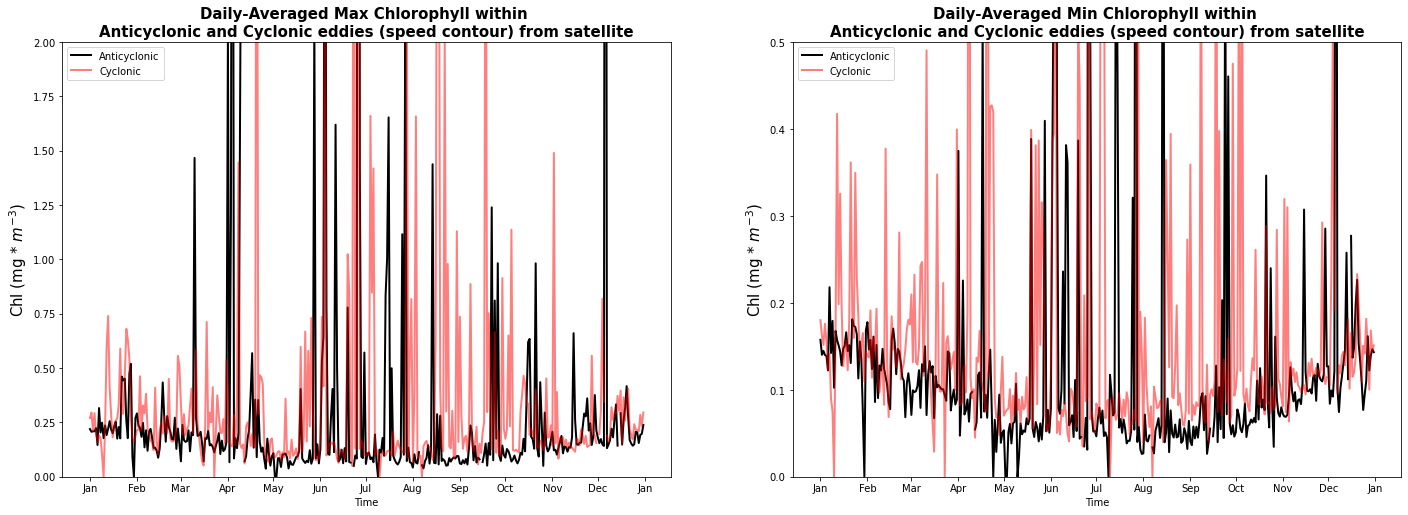

In [52]:
start = dt.datetime(2004,1,1)
#new_dates = [start + dt.timedelta(days=i) for i in range(366)]

#print(new_dates)

x = new_dates
#x=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
import matplotlib.dates as mdates
#xfmt_major=mdates.DateFormatter('\n\n%Y')
#xfmt_minor=mdates.DateFormatter('%b')
xfmt_major=mdates.DateFormatter('%b')
xfmt_minor=mdates.DateFormatter('%d')
months=mdates.MonthLocator()
#years=mdates.YearLocator()
days=mdates.DayLocator(interval=15)
#fig = plt.figure(figsize=(12, 8), dpi=80)
#ax = fig.add_axes([.03,.03,.8,.8])
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(24,8))
#ax1.set_title('Average Small Zooplankton Biomass within \nAnticyclonic eddies from model',loc='center',fontsize=15,fontweight='bold')
#ax2.set_title('Average Small Zooplankton Biomass within \nCyclonic eddies from model',loc='center',fontsize=15,fontweight='bold')
#ax1.set_title('Max and Min Chlorphyll within \nAnticyclonic eddies from  satellite',loc='center',fontsize=15,fontweight='bold')
#ax2.set_title('Max and Min Chlorphyll within \nCyclonic eddies from satellite',loc='center',fontsize=15,fontweight='bold')
ax1.set_title('Daily-Averaged Max Chlorophyll within \nAnticyclonic and Cyclonic eddies (speed contour) from satellite',loc='center',fontsize=15,fontweight='bold')
ax2.set_title('Daily-Averaged Min Chlorophyll within \nAnticyclonic and Cyclonic eddies (speed contour) from satellite',loc='center',fontsize=15,fontweight='bold')
ax1.set_ylim(0,2)
ax2.set_ylim(0,.5)
#plt.title('Average Small Zooplankton Biomass within eddies from model',loc='center',fontsize=15,fontweight='bold')#,y=1.03)
ax1.plot(x,anti_chlor_mean_max,label='Anticyclonic',color='k',lw=2)
ax2.plot(x,anti_chlor_mean_min,label='Anticyclonic',color='k',lw=2)
ax1.plot(x,cycl_chlor_mean_max,label='Cyclonic',color='red',lw=2,alpha=.5)
ax2.plot(x,cycl_chlor_mean_min,label='Cyclonic',color='red',lw=2,alpha=.5)
ax1.xaxis.set_major_locator(months)
ax1.xaxis.set_major_formatter(xfmt_major)
#ax1.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
#ax1.xaxis.set_minor_locator(days)
#ax1.xaxis.set_minor_formatter(xfmt_minor)
'''
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(xfmt_major)
ax1.xaxis.set_minor_locator(months)
ax1.xaxis.set_minor_formatter(xfmt_minor)
'''
#plt.setp(ax1.xaxis.get_minorticklabels(), rotation=90)
ax1.set_xlabel('Time')
ax1.set_ylabel('Chl (mg * $m^{-3}$)',fontsize=15)
ax1.legend(loc='best')
ax2.xaxis.set_major_locator(months)
ax2.xaxis.set_major_formatter(xfmt_major)
#ax2.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
#ax2.xaxis.set_minor_locator(days)
#ax2.xaxis.set_minor_formatter(xfmt_minor)
#plt.setp(ax2.xaxis.get_minorticklabels(), rotation=90)
ax2.set_xlabel('Time')
ax2.set_ylabel('Chl (mg * $m^{-3}$)',fontsize=15)
ax2.legend(loc='best')
plt.show()


In [ ]:
start = dt.datetime(2002,7,4)
new_dates = [start + dt.timedelta(days=i) for i in range(3639)]
#print(new_dates)
x = new_dates
import matplotlib.dates as mdates
xfmt_major=mdates.DateFormatter('\n\n%Y')
xfmt_minor=mdates.DateFormatter('%b')
months=mdates.MonthLocator()
years=mdates.YearLocator()
fig , ax = plt.subplots(figsize=(25, 10))
#ax.plot(x[15:-15],count_cycl[15:-15],'r',label='# of Cyclonic Eddies per Day')#,alpha=.5)#,ls='--',alpha=.5)
#ax.plot(x[15:-15],count_anti[15:-15],'b',label='# of Anticyclonic Eddies per Day')#,alpha=.5)
#ax.plot(x[15:-15],Rm_anti_amp[15:-15],'k',label='15 day running mean')
#ax.plot(x[15:-15],Rm_cycl_amp[15:-15],'k')#,label='15 day running mean')#,ls='--',alpha=.5)
#ax.plot(x[15:-15],Rm_cycl_amp[15:-15],'r',label='Cyclonic Eddy Amplitude (m)')#,ls='--',alpha=.5)
#ax.plot(x[15:-15],Rm_anti_amp[15:-15],'b',label='Anticyclonic Eddy Amplitude (m)')
#ax.plot(x[15:-15],Rm_cycl_amp[15:-15],'r',label='Cyclonic Eddy Speed (m/s)')#,ls='--',alpha=.5)
#ax.plot(x[15:-15],Rm_anti_amp[15:-15],'b',label='Anticyclonic Eddy Speed (m)')
ax.plot(x[15:-15],Rm_cycl_amp[15:-15],'r',label='Cyclonic Eddy Effective Contour Height (m)')#,ls='--',alpha=.5)
ax.plot(x[15:-15],Rm_anti_amp[15:-15],'b',label='Anticyclonic Eddy Effective Contour Height (m)')
ax.vlines(x=['2002-01-01','2003-01-01','2004-01-01','2005-01-01','2006-01-01','2007-01-01','2008-01-01','2009-01-01','2010-01-01','2011-01-01','2012-01-01'],
          ymin=np.min(Rm_cycl_amp), ymax=np.max(Rm_anti_amp),colors='k',label='New Year')
plt.axhline(y=0, color='k', linestyle='--')
#ax.plot(x,amp_cycl_mean_2year.effective_area,'r',label='Cyclonic Eddy Effective Area  (m^2)')#,ls='--',alpha=.5)
#ax.plot(x,amp_anti_mean_2year.effective_area,'b',label='Anticyclonic Eddy Effective Area (m^2)')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(xfmt_major)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(xfmt_minor)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)
#plt.title('Daily-Averaged Eddy Amplitude: Smoothed with 15 day Rm')
#plt.title('Daily-Averaged Maximum circum-averaged speed')
plt.title('SSH filtered height for effective contour which defines eddy edge')
#plt.title('# of Eddies per Day')
ax.set_xlabel("Time (years)")
ax.set_ylabel('SSH around eddy edge (m)')
#ax.set_ylabel('# of Eddies')
ax.legend(loc='best')
plt.show()